In [39]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [40]:
usecols = [
    'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

data = pd.read_csv(r'H:\MLbookcamp\Homework#3\housing.csv', usecols=usecols)

In [41]:
#data.head()
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [42]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [43]:
data['total_bedrooms']=data.total_bedrooms.fillna(0)

In [44]:
data['rooms_per_household']=data.total_rooms/data.households 
data['bedrooms_per_room']=data.total_bedrooms/data.total_rooms
data['population_per_household']=  data.population/data.households



In [45]:
data['ocean_proximity'].mode()

 

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [46]:
data_numeric = data.copy()
data_numeric = data.drop(["ocean_proximity","median_house_value"], axis=1)
data_numeric.describe()

#data.dtypes()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,5.429000,0.210902,3.070655
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,2.474173,0.061473,10.386050
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,0.846154,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,4.440716,0.174539,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,5.229129,0.202626,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.239273,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [47]:
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.084836,-0.104112,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047


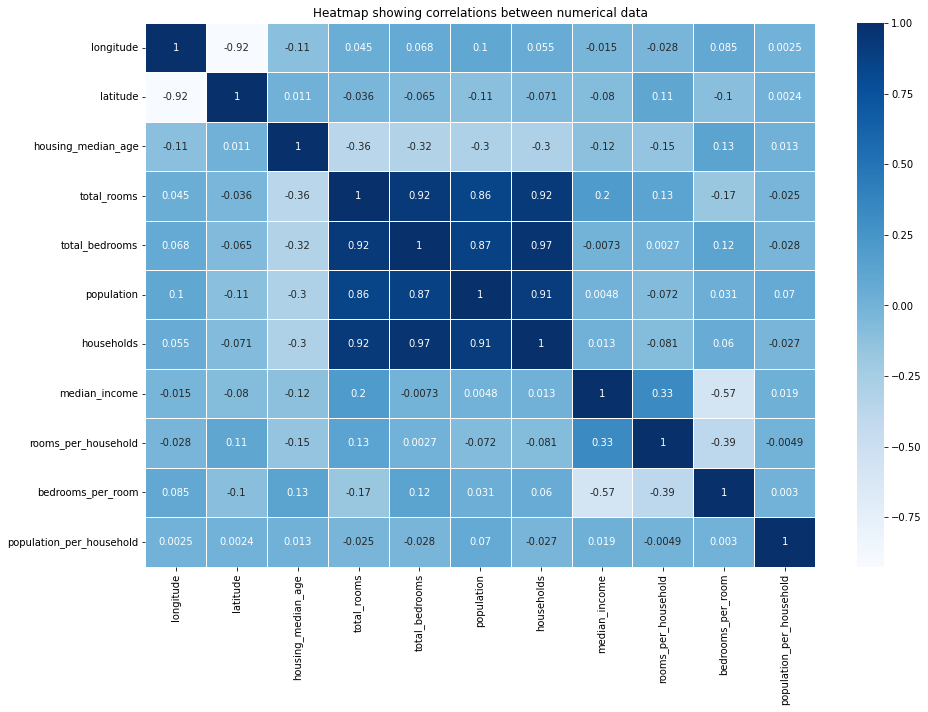

In [48]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [93]:
data_numeric.corr().unstack().sort_values(ascending = False).head(50)

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population                population                  1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.966507
households                total_bedrooms              0.966507
total_bedrooms            total_rooms                 0.920196
total_rooms               total_bedrooms              0.920196
households                total_rooms                 0

In [53]:
data_class = data.copy()
mean = data_class['median_house_value'].mean()

data_class['above_average'] = np.where(data_class['median_house_value']>=mean,1,0)

In [54]:
data_class = data_class.drop('median_house_value', axis=1)

In [59]:
from sklearn.model_selection import train_test_split

In [58]:
!pip install sklearn

In [60]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [61]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [62]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [63]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [64]:
from sklearn.metrics import mutual_info_score

In [65]:
cat = ['ocean_proximity']


def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')




In [95]:
#df_mi.round(decimals=3)
round(df_mi, 2)
df_mi

,MI
ocean_proximity,0.101384


In [73]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [74]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
num = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

In [76]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [ ]:
#model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

In [79]:
features = cat + num
features

['ocean_proximity',
 'latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [80]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.03864341085271317 0.8013565891472868
latitude 0.011996124031007693 0.8280038759689923
longitude 0.02023255813953484 0.8197674418604651
housing_median_age 0.021928294573643425 0.8180717054263565
total_rooms 0.011027131782945676 0.8289728682170543
total_bedrooms 0.013691860465116279 0.8263081395348837
population 0.039127906976744176 0.8008720930232558
households 0.015872093023255762 0.8241279069767442
median_income 0.07328488372093023 0.7667151162790697


In [81]:
data['median_house_value']=np.log1p(data['median_house_value'])

In [82]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [83]:


df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)



In [84]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [86]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [87]:


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



In [88]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [89]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [90]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [91]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.327
0.01 0.327
0.1 0.327
1 0.327
10 0.327
